In [7]:
import environment
from train import initial_train, train_DYNA_agent, train_adaptive_replay
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

plt.rcParams.update({'font.size': 14})



In [8]:
# world = environment.grid(15,10)
# dude = environment.agent(world)
grid_sizes = [6,8,10,12,14,16,18]
ws = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
rews = np.zeros((len(grid_sizes),len(ws)))
loss_reward = 0

for k in range(len(grid_sizes)):
    for m in range(len(ws)):
        print(grid_sizes[k],ws[m])
        grid_size = grid_sizes[k]
        steps = 15000
        stepsREP = grid_sizes[k]**2*100
        stepsDYNA = 15000
        replays_init = 100
        replays = 10
        eps = 40

        reward_dist = {
            (0,0): 10,      # Starting point with a reward of 10
            # (int(k/2),int(k/2)): 15,     # Center of the grid
            # (12,4): 20,     # Center of the grid
            # (2,3): 20,     # Center of the grid
            (-1,-1): 5,     # Ending point with a reward of 5
        }
        states_to_lose = [0]
        lose = [list(reward_dist.keys())[state] for state in states_to_lose]

        grid_search = {
            'w': ws[m],
            'object_value': 10,
            'replays': replays,
            'alpha': 0.1,
            'pain': -10,
            'gamma': 0.95,
            'final_epsilon': 0,
            'ep_anneal': 1,
            'p': 0.0156,
            'update': "Q-learning",
            'sampling': "random",
            'loss_reward': 0,
            'happiness': True
        }

        qs_init, model_init, qci = initial_train(reward_dist, replays=replays_init,gamma=grid_search['gamma'], 
                                                w=grid_search['w'], object_value = grid_search['object_value'],
                                                grid_size = grid_size, steps = steps)


        rew, pred, course, rep, qc, tm = train_DYNA_agent(reward_dist,lose,grid_size = grid_size, steps=stepsDYNA, 
                                                    starting_qs = qs_init, model = model_init, plotting = False,
                                                    temp=1,**grid_search)

        # rew, pred, course, rep, qc, tm = train_adaptive_replay(reward_dist, lose, grid_size = grid_size, steps = stepsREP, 
        #                   starting_qs = qs_init, model = model_init, plotting = False,  
        #                   temp=1, episodes = eps, stop_grief = 10000, **grid_search)


        rews[k,m] = rew/(5*stepsDYNA)

        cmap = plt.colormaps['Reds'] 
        cmap=cmap(np.linspace(0,1,stepsDYNA))

        actions = ['↓','↑','→','←'] # 0 is down, 1 is up, 2 is right, 3 is left
        xi = range(len(qci))
        x = range(len(qci),len(qci)+len(qc))
        ymin,ymax = np.min(qci)-2, np.max(qci)+2
        ymin,ymax = -20, 200
        cols = ['r','g','b','c','k']
        gap = int((len(qci)+len(qc))/4)
        # figures
        # fig, axes = plt.subplots(grid_size,grid_size,figsize=(5,5))
        # for i, ax in enumerate(axes.flat):
        #     for j in range(len(actions)):
        #         ax.plot(xi,np.array(qci)[:,i,j],c=cols[j],alpha=1,ls='--',linewidth=1.5,dashes=(2,1.5+0.25*j));
        #         ax.plot(x,np.array(qc)[:,i,j],c=cols[j],alpha=1,linewidth=1.5);
        #         # if i == 7: 
        #             # ax.scatter(5000*(j+1),20,s=100,marker=f'${actions[j]}$',c=cols[j],zorder=10)
        #     ax.axvline(len(qci),-100,100,c='g',ls='--',alpha=0.3)
        #     ax.set_ylim(ymin,ymax)
        #     ax.set_xticks([])
        #     ax.set_yticks([])

        #     if int(tm.flatten()[i]) != 0:
        #         ax.set_facecolor(cmap[int(tm.flatten()[i])])

        #     for axis in ['top', 'bottom', 'left', 'right']:
        #         ax.spines[axis].set_linewidth(1)  # change width
        # # plt.title(f'grid_size: {grid_sizes[k]}, W: {ws[m]}')
        # fig.tight_layout()
        # plt.subplots_adjust(wspace=0, hspace=0)
        # # Create the ScalarMappable and add the colorbar
        # fig, axes = plt.subplots(figsize=(5,5))
        # plt.gca().set_visible(False)
        # norm = Normalize(vmin=tm.min(), vmax=tm.max())
        # smappable = cm.ScalarMappable(cmap=plt.colormaps['Reds'] , norm=norm)
        # smappable.set_array([])
        # a = fig.colorbar(smappable, ax = axes, orientation='vertical')
        # a.set_label('Time state is reached',fontsize=20)


        # # axes.flat[-1].text(7000,-160,f'{int(tm[lose[-1]])}',horizontalalignment='center', verticalalignment='center');
        # print(int(tm[-1,-1]))

        # fig,ax = plt.subplots(1,2,figsize=(10,3))
        # ax[0].plot(pred,alpha=0.5)
        # ax[1].plot(course)
# plt.plot(rews)

6 0.1
6 0.2
6 0.3
6 0.4
6 0.5
6 0.6
6 0.7
6 0.8
6 0.9
6 1
8 0.1
8 0.2
8 0.3
8 0.4
8 0.5
8 0.6
8 0.7
8 0.8
8 0.9
8 1
10 0.1
10 0.2
10 0.3
10 0.4
10 0.5
10 0.6
10 0.7
10 0.8
10 0.9
10 1
12 0.1
12 0.2
12 0.3
12 0.4
12 0.5
12 0.6
12 0.7
12 0.8
12 0.9
12 1
14 0.1
14 0.2
14 0.3
14 0.4
14 0.5
14 0.6
14 0.7
14 0.8
14 0.9
14 1
16 0.1
16 0.2
16 0.3
16 0.4
16 0.5
16 0.6
16 0.7
16 0.8
16 0.9
16 1
18 0.1
18 0.2
18 0.3
18 0.4
18 0.5
18 0.6
18 0.7
18 0.8
18 0.9
18 1


Text(0, 0.5, 'Normalized reward post-loss')

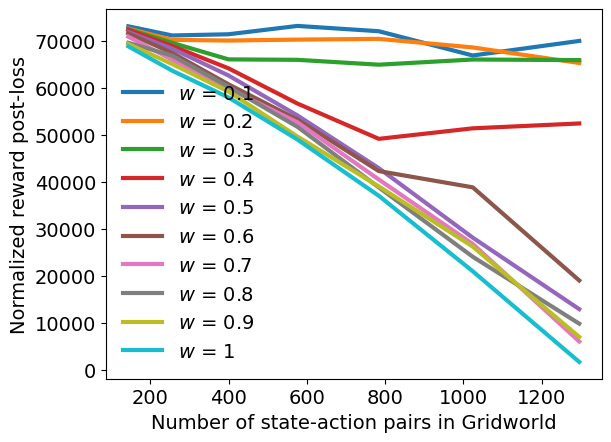

In [9]:
plt.rcParams.update({'font.size': 14})
plt.plot([4*x**2 for x in grid_sizes],rews,linewidth = 3);
plt.legend([f'$w$ = {x}' for x in ws],frameon=False)
plt.xlabel('Number of state-action pairs in Gridworld')
plt.ylabel('Normalized reward post-loss')

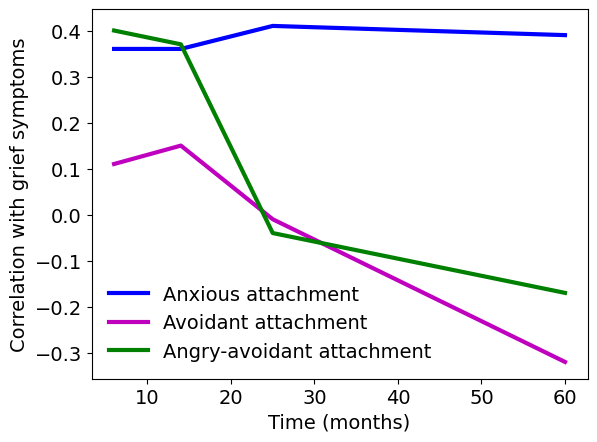

In [43]:
time_points = [6,14,25,60]
symptoms_anxious = [0.36,0.36,0.41,0.39]
symptoms_avoidant = [0.11,0.15,-0.01,-0.32]
symptoms_angry = [0.4,0.37,-0.04,-0.17]

plt.plot(time_points,symptoms_anxious,'b',linewidth=3,label = 'Anxious attachment')
plt.plot(time_points,symptoms_avoidant, 'm',linewidth=3,label = 'Avoidant attachment')
plt.plot(time_points,symptoms_angry, linewidth=3,label = "Angry-avoidant attachment",color='g')
plt.xlabel('Time (months)')
plt.ylabel('Correlation with grief symptoms')
plt.legend(frameon=0)

